In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [6]:
len(mnist.data), len(mnist.data[0]), mnist.target[0]

(70000, 784, '5')

In [14]:
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [15]:
mnist.target = mnist.target.astype(np.int8)

In [17]:
mnist.data.min(), mnist.data.max()

(0, 255)

In [21]:
X = mnist.data/255
y = mnist.target

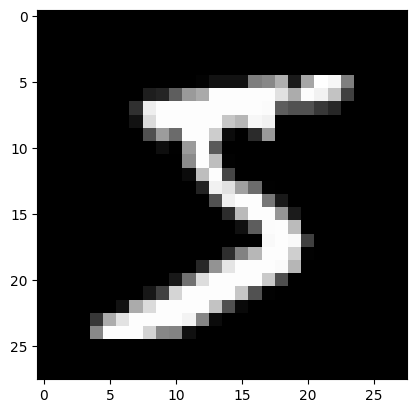

In [19]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [26]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0 )

In [27]:
len(X_train), len(X_test), len(X_train[0])

(60000, 10000, 784)

In [31]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [29]:
sigmoid = nn.Sigmoid()
model1 = nn.Sequential(
    nn.Linear(28*28*1, 100),
    sigmoid,
    nn.Linear(100, 100),
    sigmoid,
    nn.Linear(100, 10)
)

loss_fn1 = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters())

In [ ]:
epochs = 3

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer1.zero_grad()
        y_pred = model1(data)
        loss = loss_fn1(y_pred, targets)

        loss.backward()
        optimizer1.step()

    print('Epoch {:4d}/{} Cost: {:.5f}'.format(epoch+1, 3, loss.item()))
    

Epoch    4/3 Cost: 0.32031
Epoch    4/3 Cost: 0.18993
Epoch    4/3 Cost: 0.07336


In [34]:
model1.eval()
correct = 0

with torch.no_grad():
    for data, targets in loader_test:

        outputs = model1(data)

        _, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(targets.data.view_as(predicted)).sum()

data_num = len(loader_test.dataset)
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 9523/10000 (95%)



In [35]:
relu = nn.ReLU()
model2 = nn.Sequential(
    nn.Linear(28*28*1, 100),
    relu,
    nn.Linear(100, 100),
    relu,
    nn.Linear(100, 10)
)

loss_fn2 = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(model2.parameters())

In [36]:
epochs = 3

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer2.zero_grad()
        y_pred = model2(data)
        loss = loss_fn2(y_pred, targets)

        loss.backward()
        optimizer2.step()

    print('Epoch {:4d}/{} Cost: {:.5f}'.format(epoch+1, 3, loss.item()))
    

Epoch    1/3 Cost: 0.11233
Epoch    2/3 Cost: 0.12721
Epoch    3/3 Cost: 0.13323


In [40]:
model2.eval()
correct = 0

with torch.no_grad():
    for data, targets in loader_test:

        outputs = model2(data)

        _, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(targets.data.view_as(predicted)).sum()

data_num = len(loader_test.dataset)
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 9658/10000 (97%)



In [43]:
relu = nn.ReLU()
model3 = nn.Sequential(
    nn.Linear(28*28*1, 100),
    relu,
    nn.Linear(100, 100),
    relu,
    nn.Linear(100, 10)
)

loss_fn3 = nn.CrossEntropyLoss()
optimizer3 = optim.Adam(model3.parameters(), lr=0.1)

In [44]:
epochs = 3

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer3.zero_grad()
        y_pred = model3(data)
        loss = loss_fn3(y_pred, targets)

        loss.backward()
        optimizer3.step()

    print('Epoch {:4d}/{} Cost: {:.5f}'.format(epoch+1, 3, loss.item()))
    

Epoch    1/3 Cost: 1.74769
Epoch    2/3 Cost: 1.75051
Epoch    3/3 Cost: 1.75704


In [46]:
model3.eval()
correct = 0

with torch.no_grad():
    for data, targets in loader_test:

        outputs = model3(data)

        _, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(targets.data.view_as(predicted)).sum()

data_num = len(loader_test.dataset)
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 3247/10000 (32%)



In [47]:
relu = nn.ReLU()
model4 = nn.Sequential(
    nn.Linear(28*28*1, 100),
    relu,
    nn.Linear(100, 100),
    relu,
    nn.Linear(100, 10)
)

loss_fn4 = nn.CrossEntropyLoss()
optimizer4 = optim.Adam(model4.parameters(), lr=0.01)

In [48]:
epochs = 3

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer4.zero_grad()
        y_pred = model4(data)
        loss = loss_fn4(y_pred, targets)

        loss.backward()
        optimizer4.step()

    print('Epoch {:4d}/{} Cost: {:.5f}'.format(epoch+1, 3, loss.item()))
    

Epoch    1/3 Cost: 0.08840
Epoch    2/3 Cost: 0.13706
Epoch    3/3 Cost: 0.10218


In [49]:
model4.eval()
correct = 0

with torch.no_grad():
    for data, targets in loader_test:

        outputs = model4(data)

        _, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(targets.data.view_as(predicted)).sum()

data_num = len(loader_test.dataset)
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 9559/10000 (96%)



## 과적합 방지

#### 1. 모델의 복잡도 줄이기
#### 2. 가중치 규제 적용
- L1규제: 가중치 w들의 절대값 합계를 손실 함수에 추가
- L2규제: 가중치 w들의 제곱합을 손실함수에 추가
- 파이토치에서는 옵티마이저에서 weight_decay매개변수로 설정
    - weight_decay는 L2규제 적용
    - L1은 어떤 특성들이 모델에 영향을 주는지 판단할 때 유용
    - ex) torch.optim.Adam(model.parameters, weight_decay=1e-5)
#### 3. 드롭아웃

## 가중치 초기화
- 모델을 학습시킬 때 초기 가중치가 어떤 값을 가졌냐에 따라 모델의 훈련 결과가 달라짐 $\rightarrow$ 가중치 초기화를 잘 해야 함

#### 세이비어 초기화(Xavier Initialization)
$n_{in}$은 이전층의 뉴런 개수, $n_{out}$은 다음층의 뉴런 개수

$$ W \sim Uniform(-\sqrt{\displaystyle\frac{6}{n_{in} + n_{out}}}, +\sqrt{\displaystyle\frac{6}{n_{in} + n_{out}}})$$

- 정규 분포로 초기화 할 경우 평균은 0 표준 편차 $\sigma$는

$$
\sigma = \sqrt{\displaystyle\frac{2}{n_{in} + n_{out}}}
$$

- 세이비어초기화는 시그모이드나 하이퍼볼릭 탄젠트와 같은 S자 형태인 활성화 함수와 성능이 좋음(ReLU류 함수는 He초기화)

#### He 초기화
$$
W \sim Uniform(-\sqrt{\displaystyle\frac{6}{n_{in}}}, +\sqrt{\displaystyle\frac{6}{n_{in}}})
$$

- 정규 분포로 초기화 할 경우 평균은 0 표준 편차 $\sigma$는

$$
\sigma = \sqrt{\displaystyle\frac{2}{n_{in}}}
$$

## 배치 정규화
- 가중치 초기화 이외의 기울기 소실, 폭주를 방지하기 위한 방법

#### 내부 공변량 변화: 신경망 사이에서 입력 데이터의 분포 변화를 의미

#### 배치 정규화(Batch Normalization)
- 활성화 함수를 통과하기 전 값들을 배치 단위로 정규화(평균0)한다.
- $\gamma$(스케일 조정)와 $\beta$(시프트)를 사용해 정규화

*m : 미니 배치 샘플 수

*$\hat{x}^{(i)}$ : 정규화 된 입력 데이터

*$\epsilon$ : 분모가 0이 되는 것을 막는 작은 수

input: 미니배치 $B = \{x^{(1)},x^{(2)}, ... , x^{(m)}\}$

Output: $y^{(i)} = BN_{\gamma , \beta} (x^{(i)})$

미니 배치 평균 $\mu \leftarrow \displaystyle\frac{1}{m}\displaystyle\sum_{i=1}^{m}{x^{(i)}}$

미니 배치 분산 ${\sigma^2}_B \leftarrow \displaystyle\frac{1}{m}\displaystyle\sum_{i=1}^{m}{(x^{(i)}-{\mu}_B)^2}$

정규화 $\hat{x}^{(i)} \leftarrow \displaystyle\frac{x^{(i)} - \mu_B}{\sqrt{\sigma^2_B + \epsilon}}$

스케일 조정과 시프트 $y^{(i)} \leftarrow \gamma\hat{x}^{(i)} + \beta = {BN}_{\gamma,\beta}(x^{(i)})$

- 배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 구해놓았던 평균과 분산을 불러와 정규화 수행

- 모든 활성화 함수에서 기울기 소실 문제 개선
- 가중치 초기화에 덜 민감해짐
- 큰 학습률 사용 가능 $\rightarrow$ 학습 속도 개선
- 미니 배치마다 평균과 표준편차를 계산하기 때문에 데이터에 노이즈를 추가해 과적합을 방지하는데 효과적, 드롭아웃과 같이 사용
- 모델 테스트 시 평균과 표준편차를 불러오기 때문에 소요 시간 증가, 배치 정규화가 필요한지 항상 고려

#### 배치 정규화의 한계
- 미니 배치 크기에 의존적
    - 배치 크기가 작으면 잘 작동하지 않음(배치 크기가 1이라면 분산은 0)
- RNN에 적용 불가능
    - RNN은 각 시점마다 다른 통계치를 갖기 때문에 배치 정규화 적용이 어려움
    - RNN에는 층 정규화

#### 층 정규화
- 배치 정규화는 각 특징들의 평균과 표준편차를 구한다면 층 정규화는 각 데이터의 모든 특징의 평균과 표준편차를 구함